In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0771-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0421-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0531-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0416-0001-0002.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0627-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0757-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0696-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0808-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0101-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0304-0001.jpeg
/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0385-0001.jpeg
/kaggle/input/covi

# **Project Overview**
# This project focuses on the classification of chest X-ray images into three categories: 'covid', 'normal', and 'virus'.
# Using a dataset of preprocessed grayscale images, the objective is to build a robust deep learning model capable of accurate classification. The workflow involves image preprocessing, data augmentation, model building, and evaluation.


# **1. Importing Required Libraries**
# Import necessary libraries for data manipulation, visualization, and deep learning model building.

In [2]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


# **2. Data Preprocessing: Converting Images to CSV Format**
# Define a function to process and save grayscale images as flattened arrays in CSV format.

In [3]:
data_dir = "/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE"
categories = ["covid", "normal", "virus"]


def process_images_to_csv(data_dir, categories, output_csv, img_size=(128, 128)):
    with open(output_csv, 'w') as f:
       
        header = ','.join([f'pixel_{i}' for i in range(img_size[0] * img_size[1])]) + ',label\n'
        f.write(header)

        for category in categories:
            folder_path = os.path.join(data_dir, category)
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)
                try:
                
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, img_size)  
                    img = img.flatten()  
                    
                    img_data = ','.join(map(str, img))  
                    f.write(f"{img_data},{category}\n")  
                except Exception as e:
                    print(f"Error processing image {img_name}: {e}")

process_images_to_csv(data_dir, categories, "all_data_bw.csv")



# **3. Loading and Splitting the Data**
# Load the processed CSV data and split it into training and testing sets.

In [4]:
df = pd.read_csv("all_data_bw.csv")
train, test = train_test_split(df, test_size=0.2, random_state=42)

train.to_csv("train_bw.csv", index=False)
test.to_csv("test_bw.csv", index=False)


In [5]:
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_16375,pixel_16376,pixel_16377,pixel_16378,pixel_16379,pixel_16380,pixel_16381,pixel_16382,pixel_16383,label
859,36,37,37,41,71,93,74,64,60,66,...,145,108,96,118,107,107,20,0,0,normal
1022,0,0,17,28,37,43,54,67,71,78,...,42,0,0,0,0,0,0,0,1,normal
170,0,0,0,0,0,0,0,1,1,1,...,137,131,127,131,128,119,115,106,97,covid
292,0,0,0,0,0,0,0,0,0,0,...,200,199,198,200,200,201,199,201,199,covid
1146,39,54,65,70,75,87,85,79,90,149,...,28,16,0,0,0,0,0,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,0,0,0,0,0,0,...,87,66,33,19,1,0,0,0,0,normal
1294,130,110,104,99,104,104,110,119,126,123,...,15,1,0,0,0,0,0,0,4,virus
860,51,58,62,67,71,76,166,119,116,123,...,122,82,52,15,0,0,0,0,0,normal
1459,0,0,0,254,3,249,19,22,36,45,...,31,15,0,0,0,0,0,0,0,virus


In [6]:
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_16375,pixel_16376,pixel_16377,pixel_16378,pixel_16379,pixel_16380,pixel_16381,pixel_16382,pixel_16383,label
555,39,44,42,43,42,44,44,43,36,46,...,32,12,0,0,0,0,0,0,0,normal
1742,31,29,35,43,72,254,119,106,34,103,...,0,0,0,0,0,0,0,0,0,virus
297,129,123,124,111,96,95,101,101,103,117,...,198,197,191,186,176,168,162,151,137,covid
733,36,19,34,46,47,47,44,48,53,54,...,113,112,53,26,2,0,0,0,0,normal
910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,0,0,0,0,0,18,38,61,99,106,...,0,0,0,0,0,0,0,0,0,virus
787,38,33,27,64,87,102,124,138,136,147,...,30,31,33,31,32,31,32,33,29,normal
526,1,1,1,1,1,1,1,1,1,1,...,128,118,107,95,79,63,53,44,33,covid
1763,0,247,0,252,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,virus


In [7]:
label_counts = df['label'].value_counts()
label_counts

label
normal    668
virus     619
covid     536
Name: count, dtype: int64

# **4. Visualizing the Label Distribution**
# Analyze the distribution of labels in the dataset.

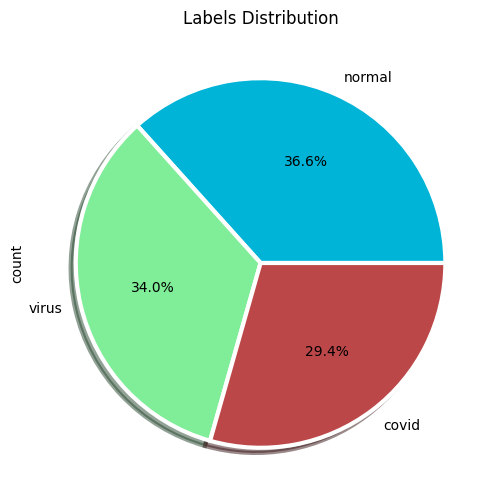

In [8]:
label_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6),  shadow=True, colors=['#00b4d8', '#80ed99',"#bc4749"], wedgeprops={"linewidth": 3, "edgecolor": "white"})
plt.title("Labels Distribution")

plt.show()

# **5. Sample Image Visualization**
# Display a few sample images from each category for a better understanding of the dataset.

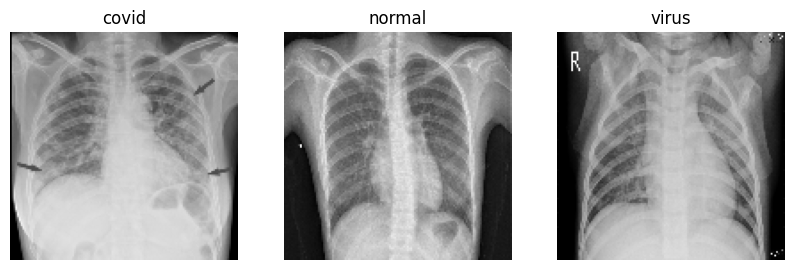

In [9]:
pixel_columns = [col for col in df.columns if col.startswith("pixel_")]

plt.figure(figsize=(10, 6))
for i, label in enumerate(df['label'].unique()):
    sample = df[df['label'] == label].sample(1)
    img = sample[pixel_columns].values.reshape(128, 128)  
    plt.subplot(1, len(df['label'].unique()), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.show()

# **6. Preparing Training and Testing Data**
# Prepare feature arrays (X) and target labels (y) for training and testing.

In [10]:
X=train.drop(columns="label", axis=1).values
y=train["label"].values


In [11]:
X=X.reshape(-1,128,128,1).astype("float32")/255.00
label_map = {
    "normal": 0,
    "covid": 1,
    "virus": 2
}
y = np.array([label_map[label] for label in y])
y = to_categorical(y, num_classes=3)

In [12]:
print(test.values.shape)

(365, 16385)


In [13]:
test_label=test["label"]
test = test.iloc[:, :-1]
data_test=test.values.reshape(-1,128,128,1).astype("float32")/255.00

In [14]:
test_label

555     normal
1742     virus
297      covid
733     normal
910     normal
         ...  
1765     virus
787     normal
526      covid
1763     virus
1317     virus
Name: label, Length: 365, dtype: object

In [15]:
X_train,X_val,y_train,y_val=train_test_split(X ,y ,test_size=0.3 ,random_state=42)

In [16]:
X_train.shape

(1020, 128, 128, 1)

In [17]:
y_train.shape

(1020, 3)

# **7. Building the CNN Model**
# Define a Convolutional Neural Network (CNN) with regularization and dropout layers to prevent overfitting.

In [18]:
model = Sequential()

model.add(Conv2D(64, (7, 7), activation="leaky_relu", input_shape=(128, 128, 1), padding="same", kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(90, (7, 7), activation="leaky_relu", padding="same", kernel_regularizer=l2(0.001)))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())


model.add(Dense(120, activation="leaky_relu"))
model.add(Dropout(0.5))

model.add(Dense(64, activation="leaky_relu"))

model.add(Dense(3, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 90)     │       282,330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 90)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 92160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │    11,059,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,352,789 (43.31 MB)

 Trainable params: 11,352,789 (43.31 MB)

 Non-trainable params: 0 (0.00 B)

# **8. Data Augmentation and Model Training**
# Apply data augmentation and train the CNN model.

In [19]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=150,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/150


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734084401.625249      74 service.cc:145] XLA service 0x79838c00c7d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734084401.625304      74 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734084401.625331      74 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/32 ━━━━━━━━━━━━━━━━━━━━ 5:16 10s/step - accuracy: 0.2812 - loss: 1.1737

I0000 00:00:1734084409.779718      74 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 366ms/step - accuracy: 0.3409 - loss: 2.1169 - val_accuracy: 0.5959 - val_loss: 0.8413
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.5995 - loss: 0.8959 - val_accuracy: 0.7100 - val_loss: 0.6773
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6708 - loss: 0.7548 - val_accuracy: 0.7237 - val_loss: 0.6695
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.6410 - loss: 0.8086 - val_accuracy: 0.8037 - val_loss: 0.5693
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.6725 - loss: 0.7674 - val_accuracy: 0.8493 - val_loss: 0.4814
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.7487 - loss: 0.6630 - val_accuracy: 0.8721 - val_loss: 0.4273
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.7804 - loss: 0.6134 - val_accuracy: 0.8721 - val_loss: 0.4335
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.7981 - loss: 0.5533 - val_accuracy: 0.8813 - val

# **9. Model Evaluation**
# Evaluate the trained model on the validation dataset.

In [20]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9370 - loss: 0.3006
Validation Loss: 0.2962399125099182
Validation Accuracy: 0.9360730648040771


# **10. Validation Predictions and Metrics**
# Predict on validation data and compute metrics.

In [21]:
y_pred = model.predict(X_val) 
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = np.argmax(y_val, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       172
           1       0.98      0.91      0.94       129
           2       0.88      0.95      0.92       137

    accuracy                           0.94       438
   macro avg       0.94      0.94      0.94       438
weighted avg       0.94      0.94      0.94       438

Accuracy: 0.9361
Precision: 0.9380
Recall: 0.9361
F1-score: 0.9364


# **11. Training Visualization**
# Plot the accuracy and loss curves during training.

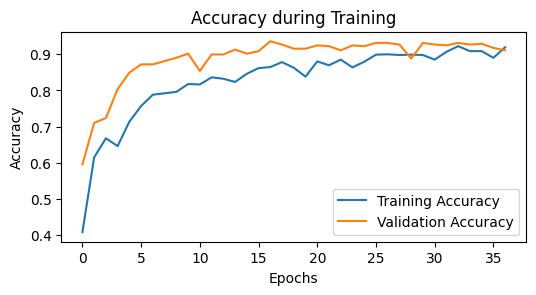

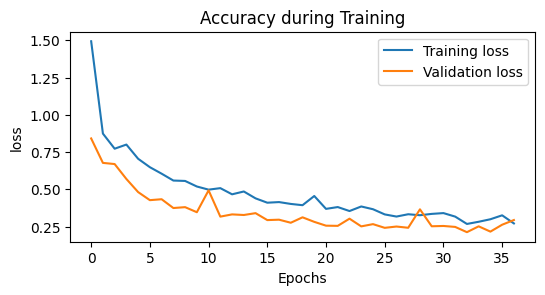

In [22]:
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy during Training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.title("Accuracy during Training")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# **12. Predict on the test dataset and derive class labels.**


In [23]:
test_predictions = model.predict(data_test)


test_pred_label = np.argmax(test_predictions, axis=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


In [24]:
test_pred_label

array([0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0,
       0, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1,
       1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1,
       2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1,
       0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 2,
       0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1,
       2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0,
       2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1,

# **Conclusion**

## The project successfully demonstrates the implementation of a convolutional neural network (CNN) for classifying chest X-ray images into three categories: 'normal,' 'covid,' and 'virus.' The data preprocessing steps, including grayscale conversion and resizing, ensured consistency across the dataset. The model's architecture was designed with layers of convolution, pooling, and dropout to improve generalization and prevent overfitting. After training, the model showed promising results in validation.
# In the testing phase, the predictions on unseen data provided insights into the model's robustness, as highlighted by the classification metrics: precision, recall, and F1-score.
# Future work could involve expanding the dataset, testing with different architectures, or employing advanced techniques like transfer learning to further enhance performance.


Name: Feras Alshash

Email: ferasalshash@gmail.com

LinkedIn: https://www.linkedin.com/in/feras-alshash-bb3106a9/

GitHub: https://github.com/FerasAlsahs